# Exercice :

Reconstruire l'apprentissage d'un réseau de neurone à propagation arrière qui comprend 2 couches d'entrées, 3 couches cachées et un neurone de sortie.

La fonction d'activation est une sigmoïde pour tous les neurones

La fonction de coût est l'erreur quadratique

L'optimisation se fait par une rétro-propagation du gradient d'erreur

## Initialisation

In [25]:
# import des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt

## Définition des entrées/sorties

Couples de valeurs en entrée : 
[0,0], [0.1,0], [0.2,0], ... [0.9,0], [1,0], [0,0.1], [0.1,0.1], ...

In [26]:
E1 = np.repeat(np.linspace(0,1,10).reshape([1,10]), 10, axis=0)
E1 = E1.reshape(100)
E2 = np.repeat(np.linspace(0,1,10),10)
E=np.array([E1, E2])

## Définition de la sortie Y que l'on souhaite

In [27]:
Y = np.zeros(E.shape[1])
for n_exe in range(0, E.shape[1]):
    if (E[0, n_exe]>=0.5 and E[1,n_exe]<0.5) or (E[0, n_exe]<0.5 and E[1,n_exe]>=0.5):
        Y[n_exe] = 1

Il faut faire en sorte que la table de vérité soit la suivante :

| in E1 | in E2 | out Y |
| ---- | ---- | ---- |
| 0 | 0 | 0 |
| 0.1 | 0 | 0 |
| 0.2 | 0 | 0 |
| 0.3 | 0 | 0 |
| 0.4 | 0 | 0 |
| 0.5 | 0 | 1 |
| 0.6 | 0 | 1 |
| 0.7 | 0 | 1 |
| 0.8 | 0 | 1 |
| 0.9 | 0 | 1 |
| 0 | 0.1 | 0 |
| 0.1 | 0.1 | 0 |
| 0.2 | 0.1 | 0 |
| 0.3 | 0.1 | 0 |
| 0.4 | 0.1 | 0 |
| 0.5 | 0.1 | 1 |
| 0.6 | 0.1 | 1 |
| 0.7 | 0.1 | 1 |
| 0.8 | 0.1 | 1 |
| 0.9 | 0.1 | 1 |
...

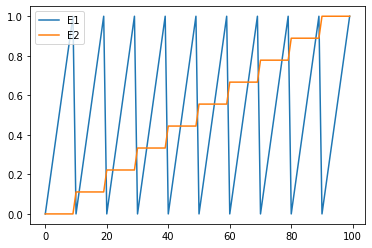

In [28]:
plt.figure()
plt.plot(E[0, :])
plt.plot(E[1, :])
# plt.plot(Y)
plt.legend(('E1', 'E2', 'Y'))
plt.show()

## Définition du réseau de neurones

In [29]:
V = np.random.rand(3,3) # 3 (2+1) valeurs en entrée et 3 neurones cachés
W = np.random.rand(1,4) # 4 (3+1) valeurs en entrée de la couche de sortie

### Algorithme d'entrainement

In [21]:
N_iteration = 1000
N_exemples = E.shape[1]
alpha = 0.2
Err_quad_moyenne = np.zeros(N_iteration)
for n_ite in range(0,N_iteration):
    for n_exe in range(0,N_exemples):
        input = np.concatenate(([1], E[:, n_exe]))  # Ajout de la valeur en entrée 1 pour calculer les biais
        # Calculer la sortie de la couche 1
        Sv = 1/(1+np.exp(-np.dot(V,input)))
        Sv = np.concatenate(([1],Sv))
        # Calculer la sortie de la couche 2
        Sw = 1/(1+np.exp(-np.dot(W,Sv)))
        # Calculer l'erreur commise par le réseau
        Err_quad_moyenne[n_ite] = Err_quad_moyenne[n_ite] + (Y[n_exe]-Sw)**2
        # Calculer les correcteurs
        delta_W = Sw*(1-Sw)*(Y[n_exe]-Sw)
        delta_V = Sv*(1-Sv)*(W*delta_W)
        # Mise à jour des poids du réseau
        V = V + alpha*np.dot(delta_V[:,1:].transpose(),input.reshape(1,3))
        W = W + alpha*delta_W*Sv
    Err_quad_moyenne[n_ite] = Err_quad_moyenne[n_ite]/N_exemples

## Affichage des resultats

In [22]:
x = range(0, n_ite)

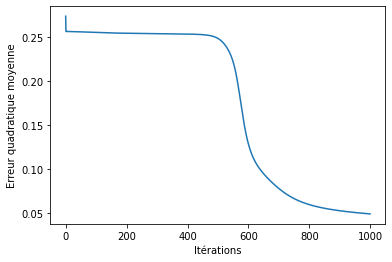

In [23]:
plt.figure()
plt.plot(Err_quad_moyenne)
plt.ylabel('Erreur quadratique moyenne')
plt.xlabel('Itérations')
plt.show()

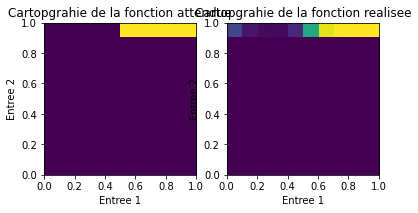

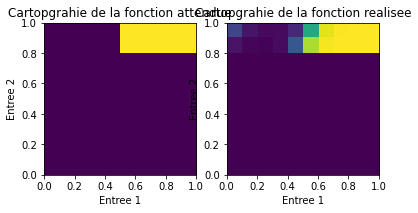

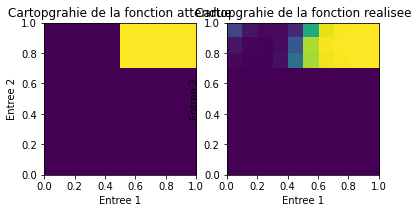

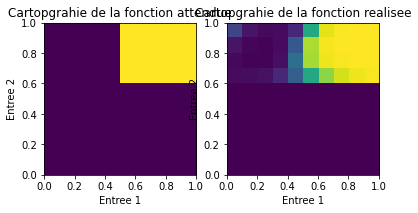

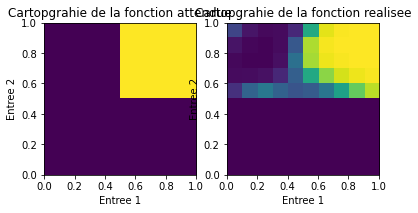

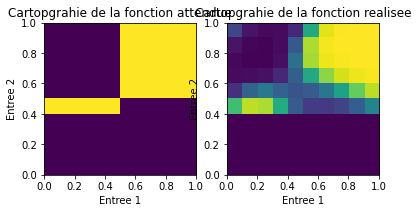

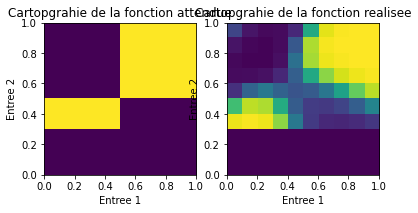

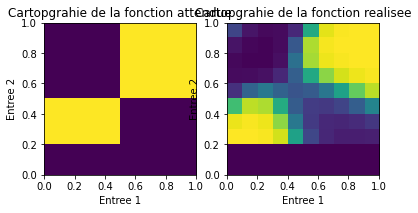

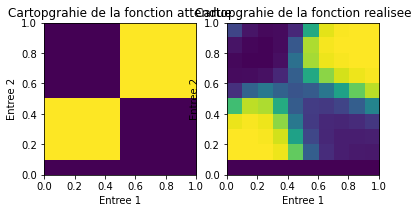

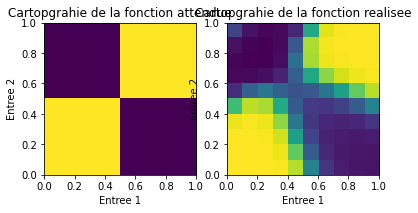

In [24]:
prediction = np.zeros([10,10])
attendue = np.zeros([10, 10])

for ii in range(0,10):
    for kk in range(0,10):
        input = np.concatenate(([1], E[:, kk+ii*10]))  # Ajout de la valeur en entrée 1 pour calculer les biais
        # Calculer la sortie de la couche 1
        Sv = 1/(1+np.exp(-np.dot(V,input)))
        Sv = np.concatenate(([1],Sv))
        # Calculer la sortie de la couche 2
        Sw = 1/(1+np.exp(-np.dot(W,Sv)))
        prediction[ii,kk] = Sw
        if (E[0, ii] >= 0.5 and E[0, kk] < 0.5) or (E[0, ii] < 0.5 and E[0, kk] >= 0.5):
            attendue[ii, kk] = 1

    plt.figure(4)
    plt.subplot(1, 2, 1)
    plt.imshow(attendue, extent=[0, 1, 0, 1])
    plt.title('Cartopgrahie de la fonction attendue')
    plt.xlabel('Entree 1')
    plt.ylabel('Entree 2')

    plt.subplot(1, 2, 2)
    plt.imshow(prediction, extent=[0, 1, 0, 1])
    plt.title('Cartopgrahie de la fonction realisee')
    plt.xlabel('Entree 1')
    plt.ylabel('Entree 2')
    plt.show()

### Evolution des poids de la couche cachee

### Evolution des poids de la couche de sortie

### Cartographie de la sortie